# Tubes IF2220 Probabilitas dan Statistika
Naufal Alexander Suryasumirat - 13519135

Naufal Yahya Kurnianto - 13519141

* [Soal_1](#Soal_1)
* [Soal_2](#Soal_2)
* [Soal_3](#Soal_3)
* [Soal_4](#Soal_4)
* [Soal_5](#Soal_5)
* [Soal_6](#Soal_6)

In [1]:
import pandas
import matplotlib.pyplot
import numpy
from scipy.stats import shapiro

In [2]:
column_names = ["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]
gandum = pandas.read_csv("./../test/Gandum.csv", header = None, names = column_names)
gandum  # Memperlihatkan Gandum.csv
        # Kolom 2 - 11 adalah kolom atribut (non-target), kolom 12 adalah target

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


### Soal_1
1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [39]:
# Soal 1
descGandum = gandum.drop(columns = ["id", "Kelas"]) # Drop kolom id dan Kelas
statistik = pandas.DataFrame() # Membuat DataFrame baru
statistik["Mean"] = descGandum.mean() # Mean
statistik["Median"] = descGandum.median() # Median

# Modus tiap kolom
mode1 = descGandum["Daerah"].mode().astype(str).str.cat(sep = ', ') # Modus kolom Daerah
mode2 = descGandum["SumbuUtama"].mode().astype(str).str.cat(sep = ', ') # Modus kolom SumbuUtama
mode3 = descGandum["SumbuKecil"].mode().astype(str).str.cat(sep = ', ') # Modus kolom SumbuKecil
mode4 = descGandum["Keunikan"].mode().astype(str).str.cat(sep = ', ') # Modus kolom Keunikan
mode5 = descGandum["AreaBulatan"].mode().astype(str).str.cat(sep = ', ') # Modus kolom AreaBulatan
mode6 = descGandum["Diameter"].mode().astype(str).str.cat(sep = ', ') # Modus kolom Diameter
mode7 = descGandum["KadarAir"].mode().astype(str).str.cat(sep = ', ') # Modus kolom KadarAir
mode8 = descGandum["Keliling"].mode().astype(str).str.cat(sep = ', ') # Modus kolom Keliling
mode9 = descGandum["Bulatan"].mode().astype(str).str.cat(sep = ', ') # Modus kolom Bulatan
mode10 = descGandum["Ransum"].mode().astype(str).str.cat(sep = ', ') # Modus kolom Ransum

# statistik["Modus"] = descGandum.mode(axis = 0, numeric_only = True).dropna().iloc[0] # Modus
statistik["Modus"] = [mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8, mode9, mode10] # Modus (diperlihatkan seluruh modus)
statistik["Std.Deviasi"] = descGandum.std() # Standar Deviasi
statistik["Variansi"] = descGandum.var() # Variansi
statistik["Range"] = descGandum.max() - descGandum.min() + 1 # Range
statistik["Maksimum"] = descGandum.max() # Maksimum
statistik["Minimum"] = descGandum.min() # Minimum
statistik["Q1"] = descGandum.quantile(.25) # Quartil pertama
statistik["Q3"] = descGandum.quantile(.75) # Quartil ketiga
statistik["IQR"] = statistik["Q3"] - statistik["Q1"] # Interquartile Range (IQR)
statistik["Skewness"] = descGandum.skew() # Skewness
statistik["Kurtosis"] = descGandum.kurtosis() # Kurtosis
statistik # Memperlihatkan DataFrame 'statistik'

,Mean,Median,Modus,Std.Deviasi,Variansi,Range,Maksimum,Minimum,Q1,Q3,IQR,Skewness,Kurtosis
Daerah,4801.246000,4735.000000,"3992, 4881, 5642, 6083",986.395491,9.729761e+05,4932.000000,7453.000000,2522.000000,4042.750000,5495.500000,1452.750000,0.238144,-0.434631
SumbuUtama,116.045171,115.405140,"74.13311404, 74.36402121, 74.69188071, 76.2931...",18.282626,3.342544e+02,154.795469,227.928583,74.133114,104.116098,129.046792,24.930694,0.761529,4.330534
SumbuKecil,53.715246,53.731199,"39.90651744, 41.43641868, 42.87187941, 43.2849...",4.071075,1.657365e+01,30.071182,68.977700,39.906517,51.193576,56.325158,5.131582,-0.010828,0.475568
Keunikan,0.878764,0.890045,"0.7199162259999999, 0.725552747, 0.731210927, ...",0.036586,1.338528e-03,1.194085,0.914001,0.719916,0.863676,0.907578,0.043902,-1.623472,2.917256
AreaBulatan,4937.048000,4857.000000,"3802, 4913",1011.696255,1.023529e+06,5142.000000,7720.000000,2579.000000,4170.250000,5654.250000,1484.000000,0.257560,-0.409685
Diameter,77.771158,77.645277,"71.29356396, 78.83325579, 84.75622403, 88.0063...",8.056867,6.491311e+01,41.747172,97.413830,56.666658,71.745308,83.648598,11.903290,0.002725,-0.466455
KadarAir,0.648372,0.626117,"0.735849057, 0.824404762",0.094367,8.905149e-03,1.468972,0.878899,0.409927,0.572632,0.726633,0.154001,0.493661,-0.740326
Keliling,281.479722,280.045500,"197.015, 200.58700000000002, 202.456, 207.325,...",37.335402,1.393932e+03,292.822000,488.837000,197.015000,255.883000,306.062500,50.179500,0.733627,2.272685
Bulatan,0.761737,0.761288,"0.174590178, 0.261297389, 0.299297624, 0.58914...",0.061702,3.807194e-03,1.730158,0.904748,0.174590,0.731991,0.796361,0.064370,-3.599237,29.975096
Ransum,2.150915,2.193599,"1.440795615, 1.453136582, 1.465950153, 1.48345...",0.249767,6.238350e-02,2.024013,2.464809,1.440796,1.983939,2.381612,0.397673,-0.658188,-0.428656


### Soal_2
2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

### TODO Soal_2 : Deskripsi

#### Kolom "Daerah"

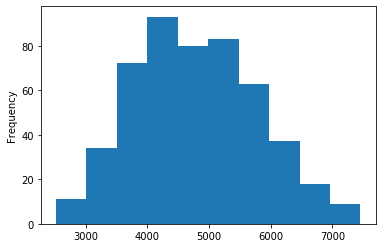

In [6]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Daerah"].plot(kind = 'hist')

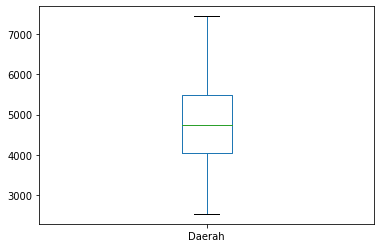

In [7]:
# Histogram Plot Kolom Daerah (Box)
gandum["Daerah"].plot(kind = 'box')

#### Kolom "Sumbu Utama"

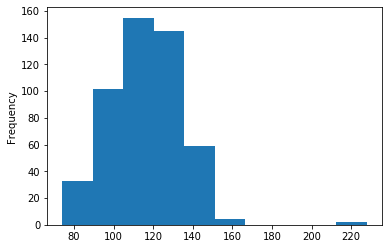

In [8]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["SumbuUtama"].plot(kind = 'hist')

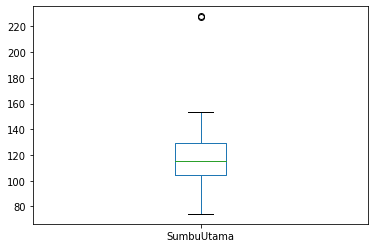

In [9]:
# Histogram Plot Kolom Daerah (Box)
gandum["SumbuUtama"].plot(kind = 'box')

#### Kolom "Sumbu Kecil"

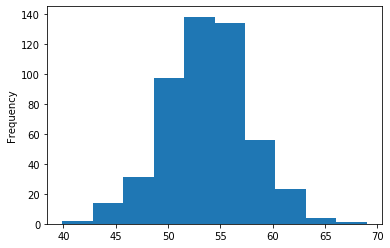

In [10]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["SumbuKecil"].plot(kind = 'hist')

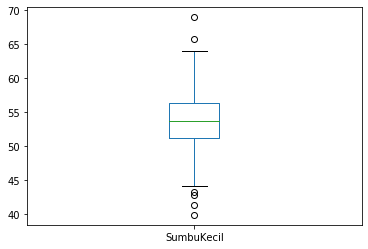

In [11]:
# Histogram Plot Kolom Daerah (Box)
gandum["SumbuKecil"].plot(kind = 'box')

#### Kolom "Keunikan"

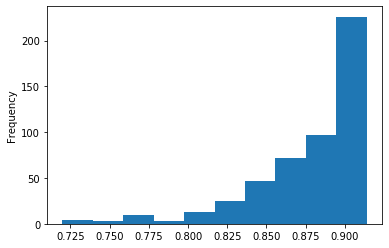

In [12]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Keunikan"].plot(kind = 'hist')

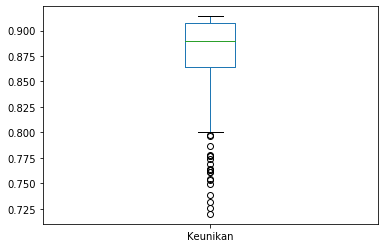

In [13]:
# Histogram Plot Kolom Daerah (Box)
gandum["Keunikan"].plot(kind = 'box')

#### Kolom "Area Bulatan"

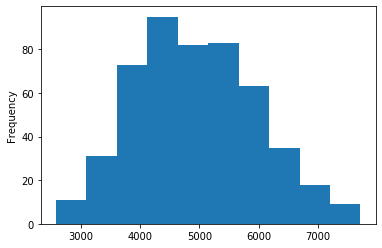

In [14]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["AreaBulatan"].plot(kind = 'hist')

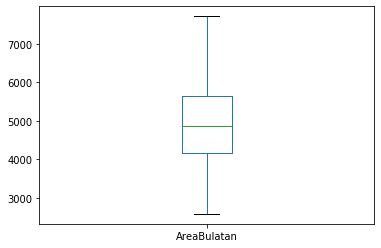

In [15]:
# Histogram Plot Kolom Daerah (Box)
gandum["AreaBulatan"].plot(kind = 'box')

#### Kolom "Diameter"

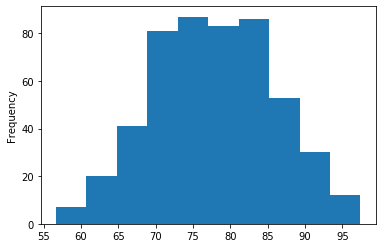

In [16]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Diameter"].plot(kind = 'hist')

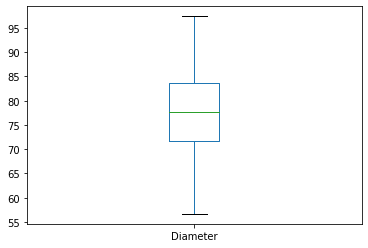

In [17]:
# Histogram Plot Kolom Daerah (Box)
gandum["Diameter"].plot(kind = 'box')

#### Kolom "Kadar Air"

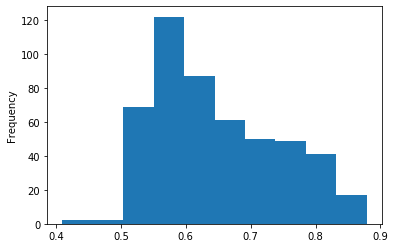

In [18]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["KadarAir"].plot(kind = 'hist')

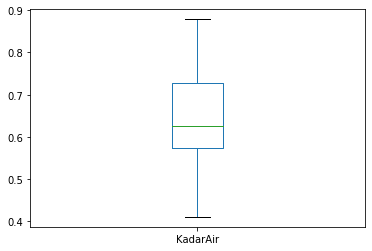

In [19]:
# Histogram Plot Kolom Daerah (Box)
gandum["KadarAir"].plot(kind = 'box')

#### Kolom "Keliling"

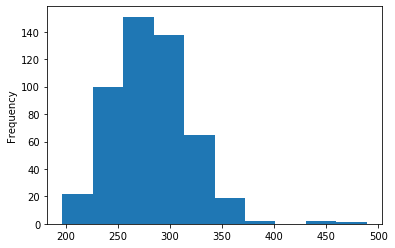

In [20]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Keliling"].plot(kind = 'hist')

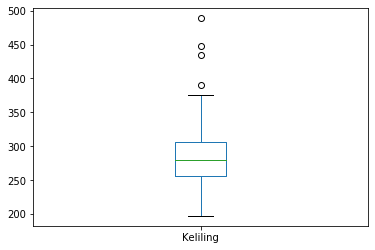

In [21]:
# Histogram Plot Kolom Daerah (Box)
gandum["Keliling"].plot(kind = 'box')

#### Kolom "Bulatan"

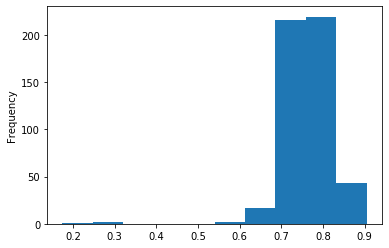

In [22]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Bulatan"].plot(kind = 'hist')

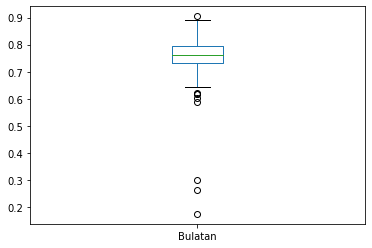

In [23]:
# Histogram Plot Kolom Daerah (Box)
gandum["Bulatan"].plot(kind = 'box')

#### Kolom "Ransum"

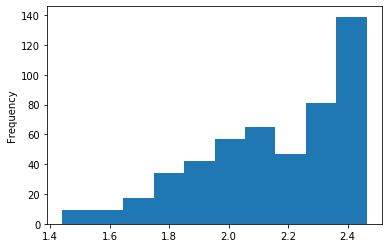

In [24]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Ransum"].plot(kind = 'hist')

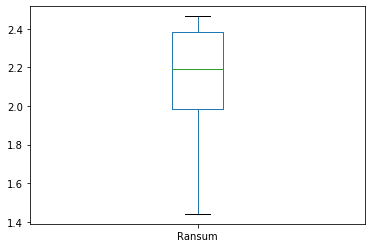

In [25]:
# Histogram Plot Kolom Daerah (Box)
gandum["Ransum"].plot(kind = 'box')

### Soal_3
3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.


#### Hasil Tes Distribusi Normal "Daerah"

In [26]:
daerah_tobe_normal = gandum["Daerah"]
daerah_stat, daerah_p = shapiro(daerah_tobe_normal)
alpha = 0.05
print("p-valuenya adalah", end=" ")
if (daerah_p > alpha):
    print(daerah_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(daerah_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 0.003270698245614767 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "SumbuUtama"

In [27]:
sumbuutama_tobe_normal = gandum["SumbuUtama"]
daerah_stat, sumbuutama_p = shapiro(sumbuutama_tobe_normal)
print("p-valuenya adalah", end=" ")
if (sumbuutama_p > alpha):
    print(sumbuutama_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(sumbuutama_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 9.236201213569384e-12 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "SumbuKecil"

In [28]:
sumbukecil_tobe_normal = gandum["SumbuKecil"]
daerah_stat, sumbukecil_p = shapiro(sumbukecil_tobe_normal)
print("p-valuenya adalah", end=" ")
if (sumbukecil_p > alpha):
    print(sumbukecil_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(sumbukecil_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 0.4234558641910553 > 0.05. Maka dari itu, sample berdistribusi normal


#### Hasil Tes Distribusi Normal "Keunikan"

In [29]:
keunikan_tobe_normal = gandum["Keunikan"]
daerah_stat, keunikan_p = shapiro(keunikan_tobe_normal)
print("p-valuenya adalah", end=" ")
if (keunikan_p > alpha):
    print(keunikan_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(keunikan_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 1.3151663082081454e-22 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "AreaBulatan"

In [30]:
areabulatan_tobe_normal = gandum["AreaBulatan"]
daerah_stat, areabulatan_p = shapiro(areabulatan_tobe_normal)
print("p-valuenya adalah", end=" ")
if (areabulatan_p > alpha):
    print(areabulatan_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(areabulatan_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 0.0024847122840583324 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "Diameter"

In [31]:
diameter_tobe_normal = gandum["Diameter"]
daerah_stat, diameter_p = shapiro(diameter_tobe_normal)
print("p-valuenya adalah", end=" ")
if (diameter_p > alpha):
    print(diameter_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(diameter_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 0.11834503710269928 > 0.05. Maka dari itu, sample berdistribusi normal


#### Hasil Tes Distribusi Normal "KadarAir"

In [32]:
kadarair_tobe_normal = gandum["KadarAir"]
daerah_stat, kadarair_p = shapiro(kadarair_tobe_normal)
print("p-valuenya adalah", end=" ")
if (kadarair_p > alpha):
    print(kadarair_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(kadarair_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 1.959499836695633e-12 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "Keliling"

In [33]:
keliling_tobe_normal = gandum["Keliling"]
daerah_stat, keliling_p = shapiro(keliling_tobe_normal)
print("p-valuenya adalah", end=" ")
if (keliling_p > alpha):
    print(keliling_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(keliling_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 9.728394090302572e-09 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "Bulatan"

In [34]:
bulatan_tobe_normal = gandum["Bulatan"]
daerah_stat, bulatan_p = shapiro(bulatan_tobe_normal)
print("p-valuenya adalah", end=" ")
if (bulatan_p > alpha):
    print(bulatan_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(bulatan_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 6.899158691421287e-26 < 0.05. Maka dari itu, sample tidak berdistribusi normal


#### Hasil Tes Distribusi Normal "Ransum"

In [35]:
ransum_tobe_normal = gandum["Ransum"]
daerah_stat, ransum_p = shapiro(ransum_tobe_normal)
print("p-valuenya adalah", end=" ")
if (ransum_p > alpha):
    print(ransum_p, end=" ")
    print(">", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample berdistribusi normal")
else:
    print(ransum_p, end=" ")
    print("<", end=" ")
    print(alpha, end="")
    print(". Maka dari itu, sample tidak berdistribusi normal")

p-valuenya adalah 6.245541108888591e-15 < 0.05. Maka dari itu, sample tidak berdistribusi normal


### Soal_4

4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.a. Nilai rata-rata Daerah di atas 4700?

    b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

    c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?

    d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

    e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?


### Soal_5

5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

    a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
    
    b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
    
    c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
    
    d. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
    
    e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?


### Soal_6

6. Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.